In [1]:
%load_ext gams.magic
import pandas as pd

In [2]:
#import CSV and remove rows with empty data
df = pd.read_csv('airline_v3.csv')
df = df.dropna()

#convert booleans and dates to numeric data for GAMS
df["Recommended"] = df["Recommended"].map(dict(yes=1,no=0))
df["Date Flown"] = pd.to_numeric(df["Date Flown"].str[-4:])
df["Review Date"] = pd.to_numeric(df["Review Date"].str[-4:])
df["Verified"] = df["Verified"].astype(int)

#split up 'seat type' and 'type of traveller' from strings into boolean ints based on the category for GAMS
df = pd.concat([df, df['Seat Type'].str.get_dummies().astype(bool).astype(int)], axis=1)
df = df.drop('Seat Type', axis=1)
df = pd.concat([df, df['Type Of Traveller'].str.get_dummies().astype(bool).astype(int)], axis=1)
df = df.drop('Type Of Traveller', axis=1)

#reset the index to match new changes and fix the names
df = df.reset_index(drop=True)
df.columns = ['airline_name', 'review_year', 'flown_year', 'recommended', 'verified', 'overall_rating', 'seat_comfort', 'cabin_staff_service', 'food_and_beverage', 'ground_service', 'inflight_entertainment', 'wifi_and_connectivity', 'value_for_money', 'business_class_seat', 'economy_class_seat', 'first_class_seat', 'premium_economy_seat', 'business_passenger', 'couple_leisure_passenger', 'family_leisure_passenger', 'solo_leisure_passenger']

#replace whitespace with underscores for airline names
df['airline_name'] = df['airline_name'].replace(' ', '_', regex=True)

#original that is formatted well (can't be used in gams due to string data)
display(df)

#original without the airline names (can be used in gams to determine which factors influence 'overall_rating' without considering brand)
no_airlines = df.drop('airline_name', axis=1)
display(no_airlines)

#original with airlines split into boolean ints (can be used in gams to determine which factors influence 'overall_rating')
split_airlines = pd.concat([df, df['airline_name'].str.get_dummies().astype(bool).astype(int)], axis=1)
split_airlines = split_airlines.drop('airline_name', axis=1)
display(split_airlines)

#only airline booleans ints and 'overall_rating' (based on brand alone)
only_airlines = pd.concat([df['overall_rating'], df['recommended'], df['airline_name']], axis=1, keys=['overall_rating', 'recommended', 'airline_name'])
only_airlines = pd.concat([only_airlines, only_airlines['airline_name'].str.get_dummies().astype(bool).astype(int)], axis=1)
only_airlines = only_airlines.drop('airline_name', axis=1)
display(only_airlines)

,airline_name,review_year,flown_year,recommended,verified,overall_rating,seat_comfort,cabin_staff_service,food_and_beverage,ground_service,...,wifi_and_connectivity,value_for_money,business_class_seat,economy_class_seat,first_class_seat,premium_economy_seat,business_passenger,couple_leisure_passenger,family_leisure_passenger,solo_leisure_passenger
0,Adria_Airways,2019,2019,0,1,1,1.0,1.0,1.0,1.0,...,1.0,1.0,0,1,0,0,0,1,0,0
1,Adria_Airways,2019,2019,0,1,1,1.0,1.0,1.0,1.0,...,1.0,1.0,0,1,0,0,0,1,0,0
2,Adria_Airways,2019,2019,0,0,1,1.0,1.0,1.0,1.0,...,1.0,1.0,0,1,0,0,0,0,0,1
3,Adria_Airways,2019,2019,0,1,1,1.0,2.0,1.0,1.0,...,1.0,1.0,0,1,0,0,0,0,0,1
4,Adria_Airways,2018,2018,0,1,1,2.0,1.0,1.0,1.0,...,1.0,1.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,ZIPAIR,2022,2022,0,0,2,4.0,4.0,1.0,4.0,...,5.0,1.0,0,1,0,0,0,0,0,1
5371,ZIPAIR,2022,2022,1,1,9,4.0,5.0,4.0,5.0,...,4.0,5.0,0,1,0,0,0,0,0,1
5372,ZIPAIR,2022,2022,0,1,1,1.0,1.0,1.0,1.0,...,1.0,1.0,0,1,0,0,1,0,0,0
5373,ZIPAIR,2022,2022,0,1,1,3.0,4.0,1.0,1.0,...,2.0,2.0,0,1,0,0,0,0,1,0


,review_year,flown_year,recommended,verified,overall_rating,seat_comfort,cabin_staff_service,food_and_beverage,ground_service,inflight_entertainment,wifi_and_connectivity,value_for_money,business_class_seat,economy_class_seat,first_class_seat,premium_economy_seat,business_passenger,couple_leisure_passenger,family_leisure_passenger,solo_leisure_passenger
0,2019,2019,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,0,1,0,0
1,2019,2019,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,0,1,0,0
2,2019,2019,0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,0,0,0,1
3,2019,2019,0,1,1,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,0,0,0,1
4,2018,2018,0,1,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,2022,2022,0,0,2,4.0,4.0,1.0,4.0,1.0,5.0,1.0,0,1,0,0,0,0,0,1
5371,2022,2022,1,1,9,4.0,5.0,4.0,5.0,3.0,4.0,5.0,0,1,0,0,0,0,0,1
5372,2022,2022,0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0,0,1,0,0,0
5373,2022,2022,0,1,1,3.0,4.0,1.0,1.0,1.0,2.0,2.0,0,1,0,0,0,0,1,0


,review_year,flown_year,recommended,verified,overall_rating,seat_comfort,cabin_staff_service,food_and_beverage,ground_service,inflight_entertainment,...,XL_Airways_France,Xiamen_Airlines,ZIPAIR,airBaltic,bmi_Regional,easyJet,euroAtlantic_Airways,fastjet,flyadeal,flydubai
0,2019,2019,0,1,1,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2019,2019,0,1,1,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2019,2019,0,0,1,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2019,2019,0,1,1,1.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2018,2018,0,1,1,2.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,2022,2022,0,0,2,4.0,4.0,1.0,4.0,1.0,...,0,0,1,0,0,0,0,0,0,0
5371,2022,2022,1,1,9,4.0,5.0,4.0,5.0,3.0,...,0,0,1,0,0,0,0,0,0,0
5372,2022,2022,0,1,1,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
5373,2022,2022,0,1,1,3.0,4.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0


,overall_rating,recommended,ANA_All_Nippon_Airways,ASKY_Airlines,Adria_Airways,Aegean_Airlines,Aer_Lingus,Aeroflot_Russian_Airlines,Aerolineas_Argentinas,Aeromar,...,XL_Airways_France,Xiamen_Airlines,ZIPAIR,airBaltic,bmi_Regional,easyJet,euroAtlantic_Airways,fastjet,flyadeal,flydubai
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5371,9,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5372,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5373,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
m = gams.exchange_container

i = m.addSet('i',records=no_airlines.index)
cols = m.addSet('cols', records=no_airlines.columns)
data = m.addParameter('data',[i,'*'],records=gams.from2dim(no_airlines))
wsolns = m.addParameter('wsolns',['*',cols])
gsolns = m.addParameter('gsolns',['*'])
#display(data.records,data.pivot())

%gams parameter A(i,cols); A(i,cols) = data(i,cols)

--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).


In [4]:
#testing data input to gams
m['data'].pivot()

,review_year,flown_year,recommended,verified,overall_rating,seat_comfort,cabin_staff_service,food_and_beverage,ground_service,inflight_entertainment,wifi_and_connectivity,value_for_money,business_class_seat,economy_class_seat,first_class_seat,premium_economy_seat,business_passenger,couple_leisure_passenger,family_leisure_passenger,solo_leisure_passenger
0,2019.0,2019.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2019.0,2019.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2019.0,2019.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2019.0,2019.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2018.0,2018.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,2022.0,2022.0,0.0,0.0,2.0,4.0,4.0,1.0,4.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5371,2022.0,2022.0,1.0,1.0,9.0,4.0,5.0,4.0,5.0,3.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5372,2022.0,2022.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5373,2022.0,2022.0,0.0,1.0,1.0,3.0,4.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
%%gams
set j(cols) index of independent variables;
j(cols) = yes$(not sameas(cols, 'recommended') and not sameas(cols, 'overall_rating'));
alias(k,cols)

parameter y(i);
y(i) = -1 + 2$(data(i,'recommended') gt 0 and data(i,'overall_rating') gt 5);

set train(i), tuning(i), test(i);
train(i) = yes$(ord(i) le 3000);
tuning(i) = yes$(ord(i) gt 3000 and ord(i) le 3500);
test(i) = yes$(ord(i) gt 3500);

scalar C /1/;

positive variables delta(i);
variables pobj, w(k), gamma;

display i;

equations defpobj, cons1(i);

cons1(i)$train(i)..
  Y(i)*(sum(k$j(k), A(i,k)*w(k)) - gamma) + delta(i) =g= 1;

defpobj..
  pobj =e= C*sum(i$train(i), delta(i)) + 0.5*sum(k$j(k), sqr(w(k)));

model svmmod /defpobj, cons1/;

solve svmmod using qcp min pobj;

*second solve

variables ay(i), v(k), obj;
equations upp(i), low(i), cons, inter(k), defObj;

inter(k)$j(k)..
v(k) =e= sum(i$train(i), ay(i)*y(i)*A(i,k));

defObj..
obj =e= sum(i$train(i), ay(i)) - 0.5*sum(k$j(k), sqr(v(k)));

cons..
sum(i$train(i), y(i)*ay(i)) =e= 0;

upp(i)$train(i)..
ay(i) =g= 0;

low(i)$train(i)..
ay(i) =l= C;


model dual / upp, low, cons, inter, defObj /;

solve dual using qcp max obj;

wsolns('primal',j) = w.l(j);
gsolns('primal') = gamma.l;
*wsolns('dual',j) = v.l(j);
wsolns('dual', j) = -inter.m(j);
*TODO: office hours for this.
gsolns('dual') = -cons.m;

display wsolns, gsolns;

set folds /f1*f5/;
set trials / t0*t5 /;
parameter posVals(trials) / t0 0.1, t1 1, t2 10, t3 100, t4 1000, t5 10000 /;
parameter errvec(trials);
set err(i);
set diff(i);

loop(trials,
  C = posVals(trials);
  err(i) = no;
  loop(folds,
    tuning(i) = yes$(i.ord gt (folds.ord-1)*700 and i.ord le folds.ord*700);
    train(i) = yes$(not test(i) and (not tuning(i)));
    solve svmmod min pobj using qcp;
    loop(tuning,
      if ((sum(j, A(tuning,j)*w.l(j)) - gamma.l) * Y(tuning) < 0,
        err(tuning) = yes;
      );
    );
  );
  errvec(trials) = card(err)/card(train);
);

*best min option
C = 1000;

solve svmmod min pobj using qcp;

parameter pred(i);
loop(test,
  if ((sum(j, A(test,j)*w.l(j)) - gamma.l)*y(test) > 0,
    pred(test) = -1;
  else
    pred(test) = 1;
  );
);

parameter errorrate;
errorrate = sum(test$(pred(test) eq 1), pred(test))/card(test);

display wsolns, gsolns, errvec, C, errorrate;

--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),6.989675e+02,3001,3020,QCP,CONOPT,4.36
1,Normal (1),OptimalLocal (2),6.989675e+02,6020,3019,QCP,CONOPT,5.938
2,Normal (1),OptimalLocal (2),6.369590e+01,2801,2820,QCP,CONOPT,1.235
3,Normal (1),OptimalLocal (2),6.716170e+01,2801,2820,QCP,CONOPT,0.406
4,Normal (1),OptimalLocal (2),5.920000e+01,2801,2820,QCP,CONOPT,0.359
5,Normal (1),OptimalLocal (2),6.598510e+01,2801,2820,QCP,CONOPT,3.297
6,Normal (1),OptimalLocal (2),6.605070e+01,2801,2820,QCP,CONOPT,0.922
7,Normal (1),OptimalLocal (2),6.348875e+02,2801,2820,QCP,CONOPT,0.219
8,Normal (1),OptimalLocal (2),6.673975e+02,2801,2820,QCP,CONOPT,0.219
9,Normal (1),OptimalLocal (2),5.920000e+02,2801,2820,QCP,CONOPT,0.39


In [6]:
wsolns_no_airlines = m['wsolns'].pivot()

In [7]:
m = gams.exchange_container

i = m.addSet('i',records=only_airlines.index)
cols = m.addSet('cols', records=only_airlines.columns)
data = m.addParameter('data',[i,'*'],records=gams.from2dim(only_airlines))
wsolns = m.addParameter('wsolns',['*',cols])
gsolns = m.addParameter('gsolns',['*'])
#display(data.records,data.pivot())

%gams parameter A(i,cols); A(i,cols) = data(i,cols)

--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).


In [8]:
%%gams
set j(cols) index of independent variables;
j(cols) = yes$(not sameas(cols, 'recommended') and not sameas(cols, 'overall_rating'));
alias(k,cols)

parameter y(i);
y(i) = -1 + 2$(data(i,'recommended') gt 0 and data(i,'overall_rating') gt 5);

set train(i), tuning(i), test(i);
train(i) = yes$(ord(i) le 3000);
tuning(i) = yes$(ord(i) gt 3000 and ord(i) le 3500);
test(i) = yes$(ord(i) gt 3500);

scalar C /1/;

positive variables delta(i);
variables pobj, w(k), gamma;

display i;

equations defpobj, cons1(i);

cons1(i)$train(i)..
  Y(i)*(sum(k$j(k), A(i,k)*w(k)) - gamma) + delta(i) =g= 1;

defpobj..
  pobj =e= C*sum(i$train(i), delta(i)) + 0.5*sum(k$j(k), sqr(w(k)));

model svmmod /defpobj, cons1/;

solve svmmod using qcp min pobj;

*second solve

variables ay(i), v(k), obj;
equations upp(i), low(i), cons, inter(k), defObj;

inter(k)$j(k)..
v(k) =e= sum(i$train(i), ay(i)*y(i)*A(i,k));

defObj..
obj =e= sum(i$train(i), ay(i)) - 0.5*sum(k$j(k), sqr(v(k)));

cons..
sum(i$train(i), y(i)*ay(i)) =e= 0;

upp(i)$train(i)..
ay(i) =g= 0;

low(i)$train(i)..
ay(i) =l= C;


model dual / upp, low, cons, inter, defObj /;

solve dual using qcp max obj;

wsolns('primal',j) = w.l(j);
gsolns('primal') = gamma.l;
*wsolns('dual',j) = v.l(j);
wsolns('dual', j) = -inter.m(j);
*TODO: office hours for this.
gsolns('dual') = -cons.m;

display wsolns, gsolns;

set folds /f1*f5/;
set trials / t0*t5 /;
parameter posVals(trials) / t0 0.1, t1 1, t2 10, t3 100, t4 1000, t5 10000 /;
parameter errvec(trials);
set err(i);
set diff(i);

loop(trials,
  C = posVals(trials);
  err(i) = no;
  loop(folds,
    tuning(i) = yes$(i.ord gt (folds.ord-1)*700 and i.ord le folds.ord*700);
    train(i) = yes$(not test(i) and (not tuning(i)));
    solve svmmod min pobj using qcp;
    loop(tuning,
      if ((sum(j, A(tuning,j)*w.l(j)) - gamma.l) * Y(tuning) < 0,
        err(tuning) = yes;
      );
    );
  );
  errvec(trials) = card(err)/card(train);
);

*best min option
C = 1000;

solve svmmod min pobj using qcp;

parameter pred(i);
loop(test,
  if ((sum(j, A(test,j)*w.l(j)) - gamma.l)*y(test) > 0,
    pred(test) = -1;
  else
    pred(test) = 1;
  );
);

parameter errorrate;
errorrate = sum(test$(pred(test) eq 1), pred(test))/card(test);

display wsolns, gsolns, errvec, C, errorrate;

--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),7.057041e+02,3001,3335,QCP,CONOPT,0.281
1,Normal (1),OptimalLocal (2),7.057041e+02,6335,3334,QCP,CONOPT,0.672
2,Normal (1),OptimalLocal (2),6.524200e+01,2801,3135,QCP,CONOPT,1.016
3,Normal (1),OptimalLocal (2),7.185770e+01,2801,3135,QCP,CONOPT,0.031
4,Normal (1),OptimalLocal (2),5.911130e+01,2801,3135,QCP,CONOPT,0.016
5,Normal (1),OptimalLocal (2),6.884180e+01,2801,3135,QCP,CONOPT,0.703
6,Normal (1),OptimalLocal (2),6.709680e+01,2801,3135,QCP,CONOPT,0.016
7,Normal (1),OptimalLocal (2),6.388182e+02,2801,3135,QCP,CONOPT,0.578
8,Normal (1),OptimalLocal (2),7.063797e+02,2801,3135,QCP,CONOPT,0.016
9,Normal (1),OptimalLocal (2),5.831355e+02,2801,3135,QCP,CONOPT,0.015


In [9]:
wsolns_only_airlines = m['wsolns'].pivot()

In [10]:
m = gams.exchange_container

i = m.addSet('i',records=split_airlines.index)
cols = m.addSet('cols', records=split_airlines.columns)
data = m.addParameter('data',[i,'*'],records=gams.from2dim(split_airlines))
wsolns = m.addParameter('wsolns',['*',cols])
gsolns = m.addParameter('gsolns',['*'])
#display(data.records,data.pivot())

%gams parameter A(i,cols); A(i,cols) = data(i,cols)

--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).


In [11]:
%%gams
set j(cols) index of independent variables;
j(cols) = yes$(not sameas(cols, 'recommended') and not sameas(cols, 'overall_rating'));
alias(k,cols)

parameter y(i);
y(i) = -1 + 2$(data(i,'recommended') gt 0 and data(i,'overall_rating') gt 5);

set train(i), tuning(i), test(i);
train(i) = yes$(ord(i) le 3000);
tuning(i) = yes$(ord(i) gt 3000 and ord(i) le 3500);
test(i) = yes$(ord(i) gt 3500);

scalar C /1/;

positive variables delta(i);
variables pobj, w(k), gamma;

display i;

equations defpobj, cons1(i);

cons1(i)$train(i)..
  Y(i)*(sum(k$j(k), A(i,k)*w(k)) - gamma) + delta(i) =g= 1;

defpobj..
  pobj =e= C*sum(i$train(i), delta(i)) + 0.5*sum(k$j(k), sqr(w(k)));

model svmmod /defpobj, cons1/;

solve svmmod using qcp min pobj;

*second solve

variables ay(i), v(k), obj;
equations upp(i), low(i), cons, inter(k), defObj;

inter(k)$j(k)..
v(k) =e= sum(i$train(i), ay(i)*y(i)*A(i,k));

defObj..
obj =e= sum(i$train(i), ay(i)) - 0.5*sum(k$j(k), sqr(v(k)));

cons..
sum(i$train(i), y(i)*ay(i)) =e= 0;

upp(i)$train(i)..
ay(i) =g= 0;

low(i)$train(i)..
ay(i) =l= C;


model dual / upp, low, cons, inter, defObj /;

solve dual using qcp max obj;

wsolns('primal',j) = w.l(j);
gsolns('primal') = gamma.l;
*wsolns('dual',j) = v.l(j);
wsolns('dual', j) = -inter.m(j);
*TODO: office hours for this.
gsolns('dual') = -cons.m;

display wsolns, gsolns;

set folds /f1*f5/;
set trials / t0*t5 /;
parameter posVals(trials) / t0 0.1, t1 1, t2 10, t3 100, t4 1000, t5 10000 /;
parameter errvec(trials);
set err(i);
set diff(i);

loop(trials,
  C = posVals(trials);
  err(i) = no;
  loop(folds,
    tuning(i) = yes$(i.ord gt (folds.ord-1)*700 and i.ord le folds.ord*700);
    train(i) = yes$(not test(i) and (not tuning(i)));
    solve svmmod min pobj using qcp;
    loop(tuning,
      if ((sum(j, A(tuning,j)*w.l(j)) - gamma.l) * Y(tuning) < 0,
        err(tuning) = yes;
      );
    );
  );
  errvec(trials) = card(err)/card(train);
);

*best min option
C = 1000;

solve svmmod min pobj using qcp;

parameter pred(i);
loop(test,
  if ((sum(j, A(test,j)*w.l(j)) - gamma.l)*y(test) > 0,
    pred(test) = -1;
  else
    pred(test) = 1;
  );
);

parameter errorrate;
errorrate = sum(test$(pred(test) eq 1), pred(test))/card(test);

display wsolns, gsolns, errvec, C, errorrate;

--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).
--- Warning: The GAMS version (44.3.0) differs from the API version (45.1.0).


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),5.905415e+02,3001,3353,QCP,CONOPT,4.593
1,Normal (1),OptimalLocal (2),5.905415e+02,6353,3352,QCP,CONOPT,0.656
2,Normal (1),OptimalLocal (2),5.987750e+01,2801,3153,QCP,CONOPT,3.281
3,Normal (1),OptimalLocal (2),6.306790e+01,2801,3153,QCP,CONOPT,1.578
4,Normal (1),OptimalLocal (2),5.716070e+01,2801,3153,QCP,CONOPT,1.406
5,Normal (1),OptimalLocal (2),6.265870e+01,2801,3153,QCP,CONOPT,1.453
6,Normal (1),OptimalLocal (2),6.251950e+01,2801,3153,QCP,CONOPT,2.468
7,Normal (1),OptimalLocal (2),5.220359e+02,2801,3153,QCP,CONOPT,1.281
8,Normal (1),OptimalLocal (2),5.542980e+02,2801,3153,QCP,CONOPT,1.485
9,Normal (1),OptimalLocal (2),5.087555e+02,2801,3153,QCP,CONOPT,1.438


In [12]:
wsolns_split_airlines = m['wsolns'].pivot()

In [13]:
display(wsolns_only_airlines, wsolns_no_airlines, wsolns_split_airlines)

,ANA_All_Nippon_Airways,ASKY_Airlines,Adria_Airways,Aegean_Airlines,Aer_Lingus,Aeroflot_Russian_Airlines,Aerolineas_Argentinas,Aeromar,Aeromexico,Africa_World_Airlines,...,XL_Airways_France,Xiamen_Airlines,ZIPAIR,airBaltic,bmi_Regional,easyJet,euroAtlantic_Airways,fastjet,flyadeal,flydubai
primal,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,...,0.0,0.0,0.0,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172
dual,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,...,-0.0,-0.0,-0.0,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172,-0.059172


,review_year,flown_year,verified,seat_comfort,cabin_staff_service,food_and_beverage,ground_service,inflight_entertainment,wifi_and_connectivity,value_for_money,business_class_seat,economy_class_seat,first_class_seat,premium_economy_seat,business_passenger,couple_leisure_passenger,family_leisure_passenger,solo_leisure_passenger
primal,0.25648,-0.382549,0.012819,-0.030828,0.292247,-0.105602,0.175714,0.085845,-0.29096,0.364767,0.285377,-0.093498,-0.085562,-0.106317,-0.100046,-0.050442,-0.100046,0.250533
dual,0.25648,-0.382549,0.012819,-0.030828,0.292247,-0.105602,0.175714,0.085845,-0.29096,0.364767,0.285377,-0.093498,-0.085562,-0.106317,-0.100046,-0.050442,-0.100046,0.250533


,review_year,flown_year,verified,seat_comfort,cabin_staff_service,food_and_beverage,ground_service,inflight_entertainment,wifi_and_connectivity,value_for_money,...,XL_Airways_France,Xiamen_Airlines,ZIPAIR,airBaltic,bmi_Regional,easyJet,euroAtlantic_Airways,fastjet,flyadeal,flydubai
primal,0.227066,-0.306136,0.037762,-0.000438,0.342144,-0.078767,0.201766,0.011672,-0.151533,0.430927,...,0.0,0.0,0.0,-1.0,-0.145464,7.276653e-14,-1.214146e-13,-0.211127,-5.764530e-14,-3.293356e-13
dual,0.227066,-0.306136,0.037762,-0.000438,0.342144,-0.078767,0.201766,0.011672,-0.151533,0.430927,...,-0.0,-0.0,-0.0,-1.0,-0.145464,-0.000000e+00,-0.000000e+00,-0.211127,-0.000000e+00,-0.000000e+00


In [47]:

new_all_data = pd.DataFrame(wsolns_split_airlines)

#twice as much as wanted.
finishMe = new_all_data.drop(new_all_data.columns[abs(new_all_data.sum(axis=0)) < 1.8], axis=1)
#finishMe = new_all_data.drop(new_all_data.columns[new_all_data.apply(lambda col: abs(col.sum()) > 3)], axis=1)

val_data = finishMe.iloc[1].values
col_data = finishMe.columns

<BarContainer object of 38 artists>

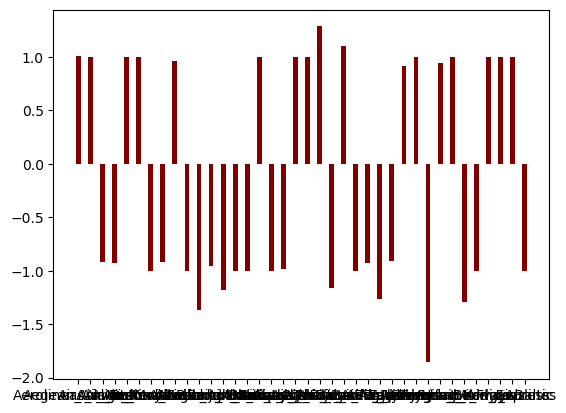

In [49]:
import matplotlib.pyplot as plt

plt.bar(col_data,val_data, color = 'maroon', width = 0.4)

In [19]:
#%gams_lst -e

In [20]:
%gams_cleanup --closedown